In [1]:
!pip3 install -Uqq duckduckgo_search -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip3 install fastcore -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip3 install -Uqq fastai -i https://pypi.tuna.tsinghua.edu.cn/simple

from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=50): 
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [3]:
urls = search_images(
    'ice cream photos', 
    max_images=1
)
urls[0]

'https://cremedecanna.com/wp-content/uploads/2020/06/crop-0-0-1358-1920-0-ice-cream-1-1.jpg'

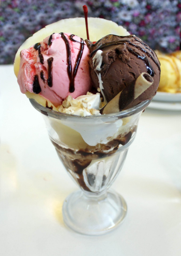

In [4]:
from fastdownload import download_url
dest = 'ice_cream.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

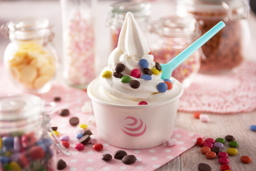

In [5]:
download_url(
    search_images('frozen yogurt photos', max_images=1)[0], 
    'frozen_yogurt.jpg', show_progress=False
)
Image.open('frozen_yogurt.jpg').to_thumb(256,256)

In [7]:
searches = 'frozen yogurt','ice cream'
path = Path('frozen_yogurt')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [32]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

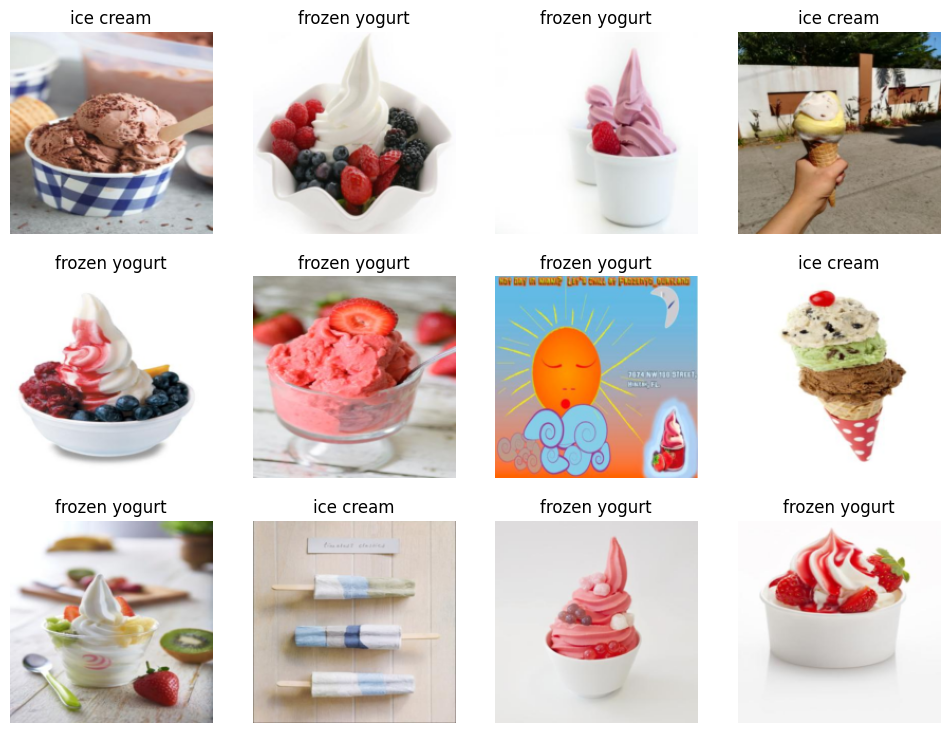

In [33]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=12)